In [11]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt

In [20]:
tickers = ["PG", "^GSPC"]
port_Data = pd.DataFrame()
for t in tickers:
    port_Data[t] = wb.DataReader(t, data_source = "yahoo", start = "2012-1-1", end = "2017-12-31")["Adj Close"]

In [21]:
port_Data.tail()

,PG,^GSPC
Date,,
2017-12-22,86.558784,2683.340088
2017-12-26,86.887634,2680.500000
2017-12-27,86.530602,2682.620117
2017-12-28,86.502419,2687.540039
2017-12-29,86.323906,2673.610107


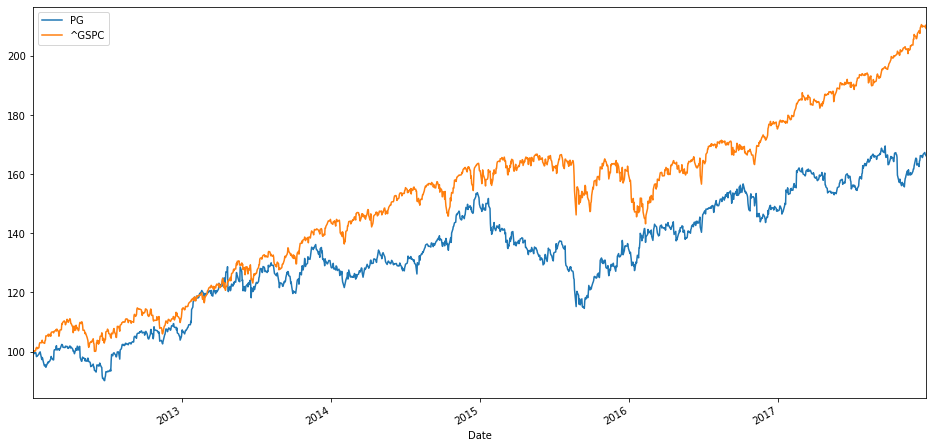

In [22]:
#normalize the data 
(port_Data/port_Data.iloc[0] * 100).plot(figsize=(16,8))
plt.show()

In [23]:
#We will check covarianve of the portfolio after getting the simple_returns for the portfolio 
simple_returns = (port_Data/port_Data.shift(1)) -1 

In [24]:
simple_returns.tail()

,PG,^GSPC
Date,,
2017-12-22,0.005018,-0.000458
2017-12-26,0.003799,-0.001058
2017-12-27,-0.004109,0.000791
2017-12-28,-0.000326,0.001834
2017-12-29,-0.002064,-0.005183


In [25]:
port_cov = simple_returns.cov() * 250

In [26]:
pg_tomarket_var = port_cov.iloc[0,1]
print(f"PG to GSPC covariance value is {pg_tomarket_var}")

PG to GSPC covariance value is 0.008646430750613004


In [27]:
#To calculate the beta we will need to get the variance of the market
gspc_var = simple_returns["^GSPC"].var() * 250
print(f"The variance of the market is {gspc_var}")

The variance of the market is 0.014355959781626456


In [36]:
# we will use the calculated data about to calculate beta
Beta_PG = pg_tomarket_var/gspc_var
print(f"The Beta for PG in relation to the Market (^GSPC) is {Beta_PG} which tells\n us that PG is a defensive stock. When the market takes a hit it will be effected but not a great deal and when the market recovers PG will reeover lightly as well")



The Beta for PG in relation to the Market (^GSPC) is 0.6022885883031784 which tells
 us that PG is a defensive stock. When the market takes a hit it will be effected but not a great deal and when the market recovers PG will reeover lightly as well


In [45]:
# we will use the above calculation to calculate the expected return for PG in relation to the market 
pg_return = 0.0179 + Beta_PG *(0.05)
print(f"The expected return for PG in relation to the market is {round(pg_return,3)*100} % for the lowest amount of risk an investor is taking")

The expected return for PG in relation to the market is 4.8 % for the lowest amount of risk an investor is taking


In [47]:
#lets calculate the sharp ratio of OG 
sharp_PG = (pg_return - 0.0179)/(simple_returns["PG"].std() * 250 ** 0.5)
print(f"The sharp ratio of PG in relation to the market is {sharp_PG}")

The sharp ratio of PG in relation to the market is 0.21900631854623803
